<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏠 Modeling</h1></center>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the required Libraries, Metrics</h1>

In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the saved NumPy arrays i.e. X_train_df, X_test_df, y_train_df, and y_test_df </h1>

In [3]:
import numpy as np
import pandas as pd
X_train = np.load('../Data/X_train.npy')
X_test = np.load('../Data/X_test.npy')
y_train = np.load('../Data/y_train.npy')
y_test = np.load('../Data/y_test.npy')
X = np.load('../Data/X.npy')
y = np.load('../Data/y.npy')

***Declaring Evaluation functions***

In [4]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Regression Models</h1>

***Defining a DataFrame to Store Evaluation Values***

In [5]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44418.6502037297
MSE: 2922075221.7212996
RMSE: 54056.222784442674
R2 Score: 0.6484412222973355
------------------------------
RMSE Cross-Validation: 60820.18729873848


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [7]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44418.75674465924
MSE: 2922078151.0748
RMSE: 54056.24987986866
R2 Score: 0.6484408698628983
------------------------------
RMSE Cross-Validation: 60819.743576278


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [8]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44418.65419614436
MSE: 2922073484.5895557
RMSE: 54056.206716616325
R2 Score: 0.6484414312939787
------------------------------
RMSE Cross-Validation: 60820.00072234475


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [9]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44451.50683210451
MSE: 2923031702.6745152
RMSE: 54065.069154441255
R2 Score: 0.6483261467947239
------------------------------
RMSE Cross-Validation: 60715.96902051384


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [10]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 60265.55399389215
MSE: 4588637965.474653
RMSE: 67739.48601424912
R2 Score: 0.44793482985286015
------------------------------


RMSE Cross-Validation: 71129.14695789172


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [11]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 21192.160099999997
MSE: 1320784102.890398
RMSE: 36342.59350803679
R2 Score: 0.8410946982577214
------------------------------
RMSE Cross-Validation: 43631.330820325835


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [12]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 25421.8615625
MSE: 1668370013.3294604
RMSE: 40845.685369809384
R2 Score: 0.7992761725359084
------------------------------
RMSE Cross-Validation: 48759.70007574942


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The model's performance improves as the Root Mean Squared Error (RMSE) decreases.***

In [13]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,21192.160100,1.320784e+09,36342.593508,0.841095,43631.330820
6,XGBRegressor,25421.861562,1.668370e+09,40845.685370,0.799276,48759.700076
3,ElasticNet,44451.506832,2.923032e+09,54065.069154,0.648326,60715.969021
1,Ridge,44418.756745,2.922078e+09,54056.249880,0.648441,60819.743576
2,Lasso,44418.654196,2.922073e+09,54056.206717,0.648441,60820.000722
0,LinearRegression,44418.650204,2.922075e+09,54056.222784,0.648441,60820.187299
4,SVR,60265.553994,4.588638e+09,67739.486014,0.447935,71129.146958


***RMSE (Cross-Validation) is less in ElasticNet Model***

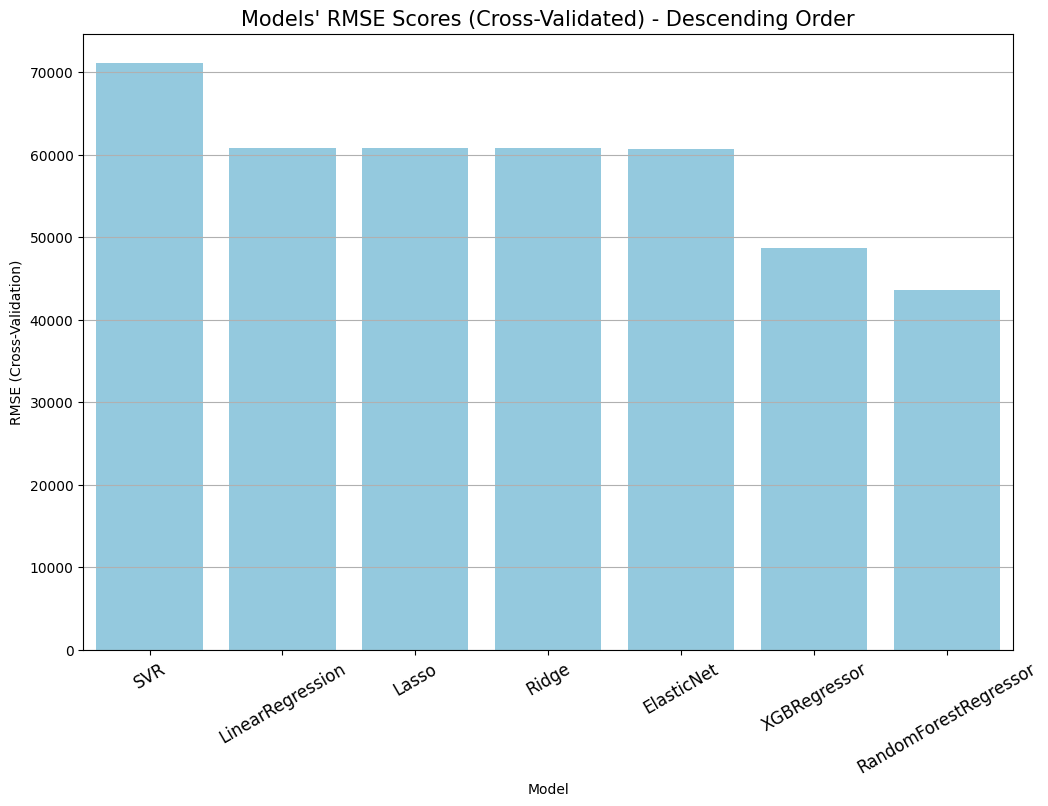

In [14]:
sorted_models = models.sort_values(by='RMSE (Cross-Validation)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='RMSE (Cross-Validation)', data=sorted_models, color='skyblue')
plt.title("Models' RMSE Scores (Cross-Validated) - Descending Order", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel('RMSE (Cross-Validation)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Build ElasticNet model with best parameters</h1>

In [15]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.1, 0.5, 1.0], 
    'l1_ratio': [0.1, 0.5, 0.9] 
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'alpha': 1.0, 'l1_ratio': 0.1}
Best Estimator: ElasticNet(l1_ratio=0.1)


In [16]:
best_alpha = 1.0
best_l1_ratio = 0.1
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
predictions = best_elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(best_elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet_WITH BEST PARAMS","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
new_row_df = pd.DataFrame([new_row])
models = pd.concat([models, new_row_df], ignore_index=True)

MAE: 44469.29133774344
MSE: 2923456064.7443233
RMSE: 54068.99356141488
R2 Score: 0.6482750912265933
------------------------------
RMSE Cross-Validation: 60678.2859118042


In [17]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,21192.160100,1.320784e+09,36342.593508,0.841095,43631.330820
6,XGBRegressor,25421.861562,1.668370e+09,40845.685370,0.799276,48759.700076
7,ElasticNet_WITH BEST PARAMS,44469.291338,2.923456e+09,54068.993561,0.648275,60678.285912
3,ElasticNet,44451.506832,2.923032e+09,54065.069154,0.648326,60715.969021
1,Ridge,44418.756745,2.922078e+09,54056.249880,0.648441,60819.743576
2,Lasso,44418.654196,2.922073e+09,54056.206717,0.648441,60820.000722
0,LinearRegression,44418.650204,2.922075e+09,54056.222784,0.648441,60820.187299
4,SVR,60265.553994,4.588638e+09,67739.486014,0.447935,71129.146958


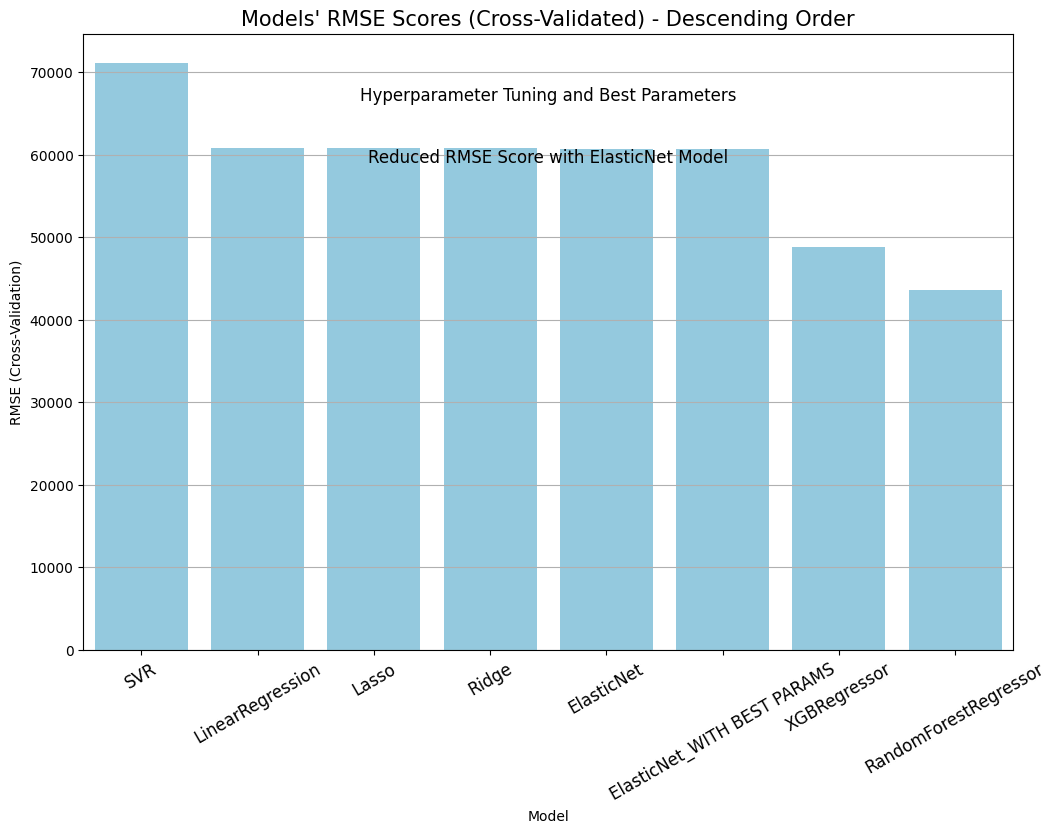

In [18]:
sorted_models = models.sort_values(by='RMSE (Cross-Validation)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='RMSE (Cross-Validation)', data=sorted_models, color='skyblue')
plt.title("Models' RMSE Scores (Cross-Validated) - Descending Order", size=15)
plt.xticks(rotation=30, size=12)
plt.ylabel('RMSE (Cross-Validation)')
plt.xlabel('Model')
plt.grid(axis='y')
plt.text(0.5, 0.9, 'Hyperparameter Tuning and Best Parameters', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.8, 'Reduced RMSE Score with ElasticNet Model', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


***Comparison of House Prices and RMSE Cross-Validation***

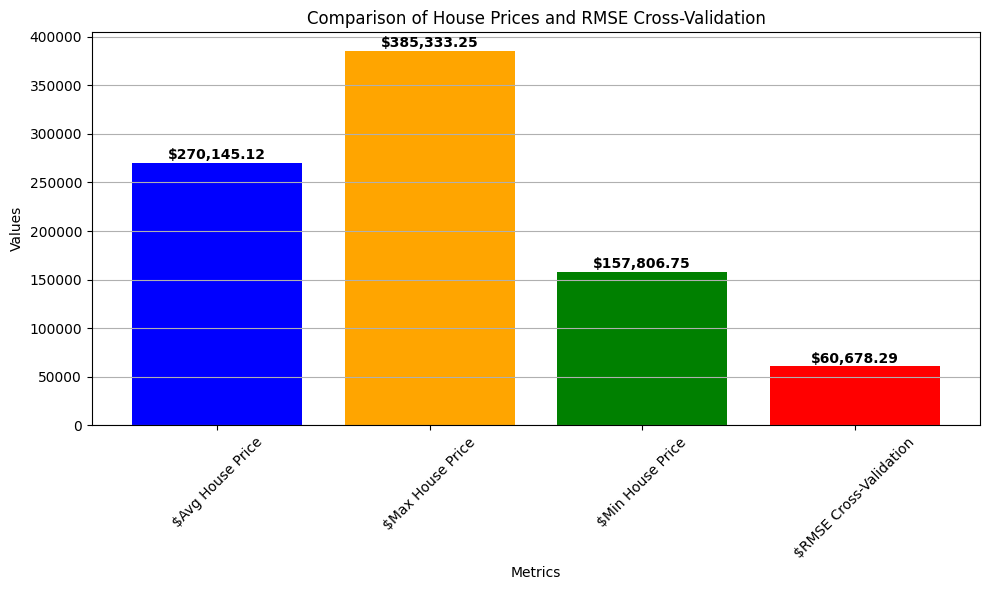

In [19]:
average_house_price = y.mean()
maximum_house_price = y.max()
rmse_cross_val = rmse_cv(best_elastic_net)
minimum_house_price = y.min()

values = [average_house_price, maximum_house_price, minimum_house_price, rmse_cross_val]
labels = ['$Avg House Price', '$Max House Price', '$Min House Price', '$RMSE Cross-Validation']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, v + max(values) * 0.01, f"${v:,.2f}", ha='center', color='black', fontweight='bold')

plt.title('Comparison of House Prices and RMSE Cross-Validation')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


## <span style="font-family: 'Times New Roman'">Why I Choose RMSE Over MAE</span>

- ***I have selected RMSE (Root Mean Square Error) instead of MAE (Mean Absolute Error) because RMSE gives higher weight to larger errors.***
- ***This helps capture significant errors better, providing a clearer picture of how well our predictive model performs.***

### <span style="font-family: 'Times New Roman'">RMSE Greater Than Doble the Minimum House Price - A Serious Problem</span>

- ***RMSE goes beyond the double the minimum house price, it's a big issue.***
- ***This situation suggests our model isn't doing well, possibly due to not having enough data, leading to underfitting.***
- ***To improve this, I'm focusing on refining the model through hyperparameter tuning with Boosting algorithms.***


***Over/underfitting check***

In [20]:
# build stochastic Gradient Boosting Regressor
sgbr= GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, min_samples_split= 35, n_estimators= 300, subsample= 0.8, random_state= 100)
sgbr.fit(X_train, y_train)
rmse_cv(sgbr)
# Create a list of base estimators
estimators= [ ('Ridge', ridge), 
             ('lasso', lasso),
            ('sgbr', sgbr)]
# Instantiate and fit the VotingRegressor model
voting = VotingRegressor(estimators= estimators, weights= [0.2, 0.2, 0.6]).fit(X_train, y_train)
kf= KFold(n_splits=8, shuffle= True, random_state= 100)
cv_scores= np.sqrt(-cross_val_score(voting, X_train, y_train, cv= kf, scoring="neg_mean_squared_error"))
y_pred_train= voting.predict(X_train)
y_pred_test= voting.predict(X_test)
print(f"- voting regressor model CV mean error score = {np.mean(cv_scores):0.3f}")    
print(f"- voting regressor model train mean error score = {np.sqrt(mean_squared_error(y_train, y_pred_train)):0.3f}")    
print(f"- voting regressor model test mean error score = {np.sqrt(mean_squared_error(y_test, y_pred_test)):0.3f}")

- voting regressor model CV mean error score = 48782.820
- voting regressor model train mean error score = 34829.037
- voting regressor model test mean error score = 42282.551


## <span style="font-family: 'Times New Roman'">Interpreting Model Performance</span>

When the Cross-Validation (CV) error is notably higher than the training error, it could imply that the model struggles to generalize to unseen data. This discrepancy might suggest potential underfitting issues, where the model doesn't capture the complexities within the data, resulting in poor performance on unseen instances.

### <span style="font-family: 'Times New Roman'">Mitigating Underfitting</span>

To address potential underfitting concerns, one strategy involves increasing the model's complexity and exploring hyperparameter tuning with sophisticated algorithms such as GradientBoostingRegressor, using techniques like RandomizedSearchCV.

- **RandomizedSearchCV**: Utilize this method to efficiently explore a range of hyperparameters, allowing the model to learn more intricate patterns within the data.
- **GradientBoostingRegressor**: Implement more complex models like Gradient Boosting, known for its ability to handle non-linear relationships and improve predictive performance.

By adjusting the model's complexity and exploring advanced algorithms with randomized hyperparameter search, we aim to enhance the model's ability to capture intricate patterns and improve its performance on unseen data.


***Model Tuning with GradientBoostingRegressor***

In [21]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
gbr = GradientBoostingRegressor(random_state=0)
gbr_random_search = RandomizedSearchCV(gbr, param_dist, n_iter=10, cv=3, random_state=0)
gbr_random_search.fit(X_train, y_train)
best_params = gbr_random_search.best_params_
gbr_best = GradientBoostingRegressor(**best_params, random_state=0)
gbr_best.fit(X_train, y_train)
y_pred = gbr_best.predict(X_test)
print("Best Parameters:", best_params)
mse_cross_val = rmse_cv(gbr_best)
print("RMSE Cross-Validation:", mse_cross_val)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
RMSE Cross-Validation: 43827.2773747267


## <span style="font-family: 'Times New Roman'">Comparison of Elastic Net and Gradient Boosting Regressor</span>

- ***RMSE CV score is better in Elastic Net than Gradient Boosting Regressor due to the data's linear relationship favoring Elastic Net's regularization, providing better performance in this context.***
- ***So,  opting for the Elastic Net model with the best parameters could be a better choice for making predictions.***

## <span style="font-family: 'Times New Roman'">Hosting ElasticNet model using Streamlit</span>


***Train and Save the Model***

In [22]:
elastic_net = ElasticNet()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(**best_params)
best_elastic_net.fit(X_train, y_train)


ElasticNet(l1_ratio=0.1)

***Serialize the Model:***

In [23]:
import joblib
joblib.dump(best_elastic_net, 'elastic_net_model.pkl')

['elastic_net_model.pkl']